In [1]:
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%run ProcessData.ipynb



_______________
# Ploting methods

In [2]:
def drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, prob_factor):
    set_matplotlib_formats('retina')

    x = np.arange(len(best_y))
    string = str(prob_factor)
    line1, = plt.plot(x, best_y, color='g')
    line2, = plt.plot(x, temp, color='orange')
    plt.scatter(x, curr_y, s=1, label='Current Solution', color='blue')
    plt.scatter(x, acceptance_pb*prob_factor, s=1, label='Acceptance proba x'+string, color='pink')

    line1.set_label('Best Solution')
    line2.set_label('Temperature')


    fig = plt.gcf()
    fig.set_size_inches(13,10)

    plt.legend()
    plt.yscale('log')
    plt.show()

In [3]:
def drawPlotLSA2(best_y, curr_y):
    set_matplotlib_formats('retina')

    x = np.arange(len(best_y))
    line1, = plt.plot(x, best_y, color='g')
    plt.scatter(x, curr_y, s=1, label='Current Solution', color='blue')


    line1.set_label('Best Solution')


    fig = plt.gcf()
    fig.set_size_inches(16,5)

    plt.legend()
    plt.show()

In [4]:
def drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor, density_factor):
    set_matplotlib_formats('retina')

    x = np.arange(len(best_y))
    string = str(prob_factor)
    string2 = str(density_factor)
    
    line1, = plt.plot(x, best_y, color='g')
    line2, = plt.plot(x, temp, color='orange')
    line3, = plt.plot(x, markov_len, color='grey')
    line5, = plt.plot(x, density*density_factor, color='purple')
    
    plt.scatter(x, curr_y, s=3, marker=">", label='Current Solution', color='blue')
    plt.scatter(x, acceptance_pb*prob_factor, s=1, marker='+', label='Acceptance proba x'+string, color='pink')


    line1.set_label('Best Solution')
    line2.set_label('Temperature')
    line3.set_label('Actual MarkovChains Length')
    line5.set_label('CG Density x'+string2)



    fig = plt.gcf()
    fig.set_size_inches(13,10)

    plt.legend()
    plt.yscale('log')
    plt.show()

In [5]:
def drawSolutionDSAMF(curr_y, best_y, curr_x, best_x):
    set_matplotlib_formats('retina')

    cm = plt.cm.get_cmap('Greys')
    lenY = len(curr_y)

    x = np.linspace(-3, 3, 10000)
    y = np.log(0.1*np.sin(30*x) + 0.01*np.power(x, 4) - 0.1 *np.power(x,2) +1)+1;
    #y = np.log(0.1*np.sin(10*x) + 0.01*np.power(x, 4) - 0.1 *np.power(x,2) +1)+1+0.7*x*x;

    line1, = plt.plot(x, y, color='k',linewidth=0.3 , zorder=1)
    line1.set_label('Objective function')
    
    plt.scatter(curr_x, curr_y, c=range(lenY), vmin=0, vmax=lenY, s=20, label='Current Solution', cmap=cm, zorder=10)
    plt.scatter(best_x, best_y, s=50, marker="x", label='Best Solution', color='red', zorder=100)

    fig = plt.gcf()
    fig.set_size_inches(15,15)

    ax = plt.gca()
    ax.set_facecolor('navajowhite')

    plt.legend()
    plt.show()

In [6]:
#path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction.txt"
#best_y, curr_y, acceptance_pb, acc_best_sol, temp, density, markov_len, runtime, iteration_nbr = processDataDSA(path)
#path = "../java/SimulatedAnnealing/GraphData/DSA_MF_currX.txt"
#best_x, curr_x = processDataDSA_MF(path)
#drawSolutionDSAMF(curr_y, best_y, curr_x, best_x)

In [18]:
def drawSolutionDSAMF3D(curr_y, best_y, curr_x, best_x):
    set_matplotlib_formats('retina')
    CMAP = "viridis_r"#"viridis"
    
    N = 1000
    x = np.linspace(-10, 10, N)
    y = np.linspace(-10, 10, N).reshape(-1, 1)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(-0.15*(x*x+y*y))+0.05*(np.power(x+np.pi, 2)+np.power(y-2, 2)) + 2;

    
    fig, ax = plt.subplots()
    cs = ax.contourf(X, Y, Z, 50, cmap=CMAP)
    
    
    plt.scatter(curr_x, curr_y, c=range(len(curr_y)), vmin=0, vmax=len(curr_y), s=20, label='Current Solution', cmap="Greys", zorder=10)
    plt.scatter(best_x, best_y, s=50, marker="x", label='Best Solution', color='red', zorder=100)


    fig = plt.gcf()
    fig.set_size_inches(13,10)

    plt.xlabel("x values")
    plt.ylabel("y values")

    cbar = fig.colorbar(cs)

    plt.show()

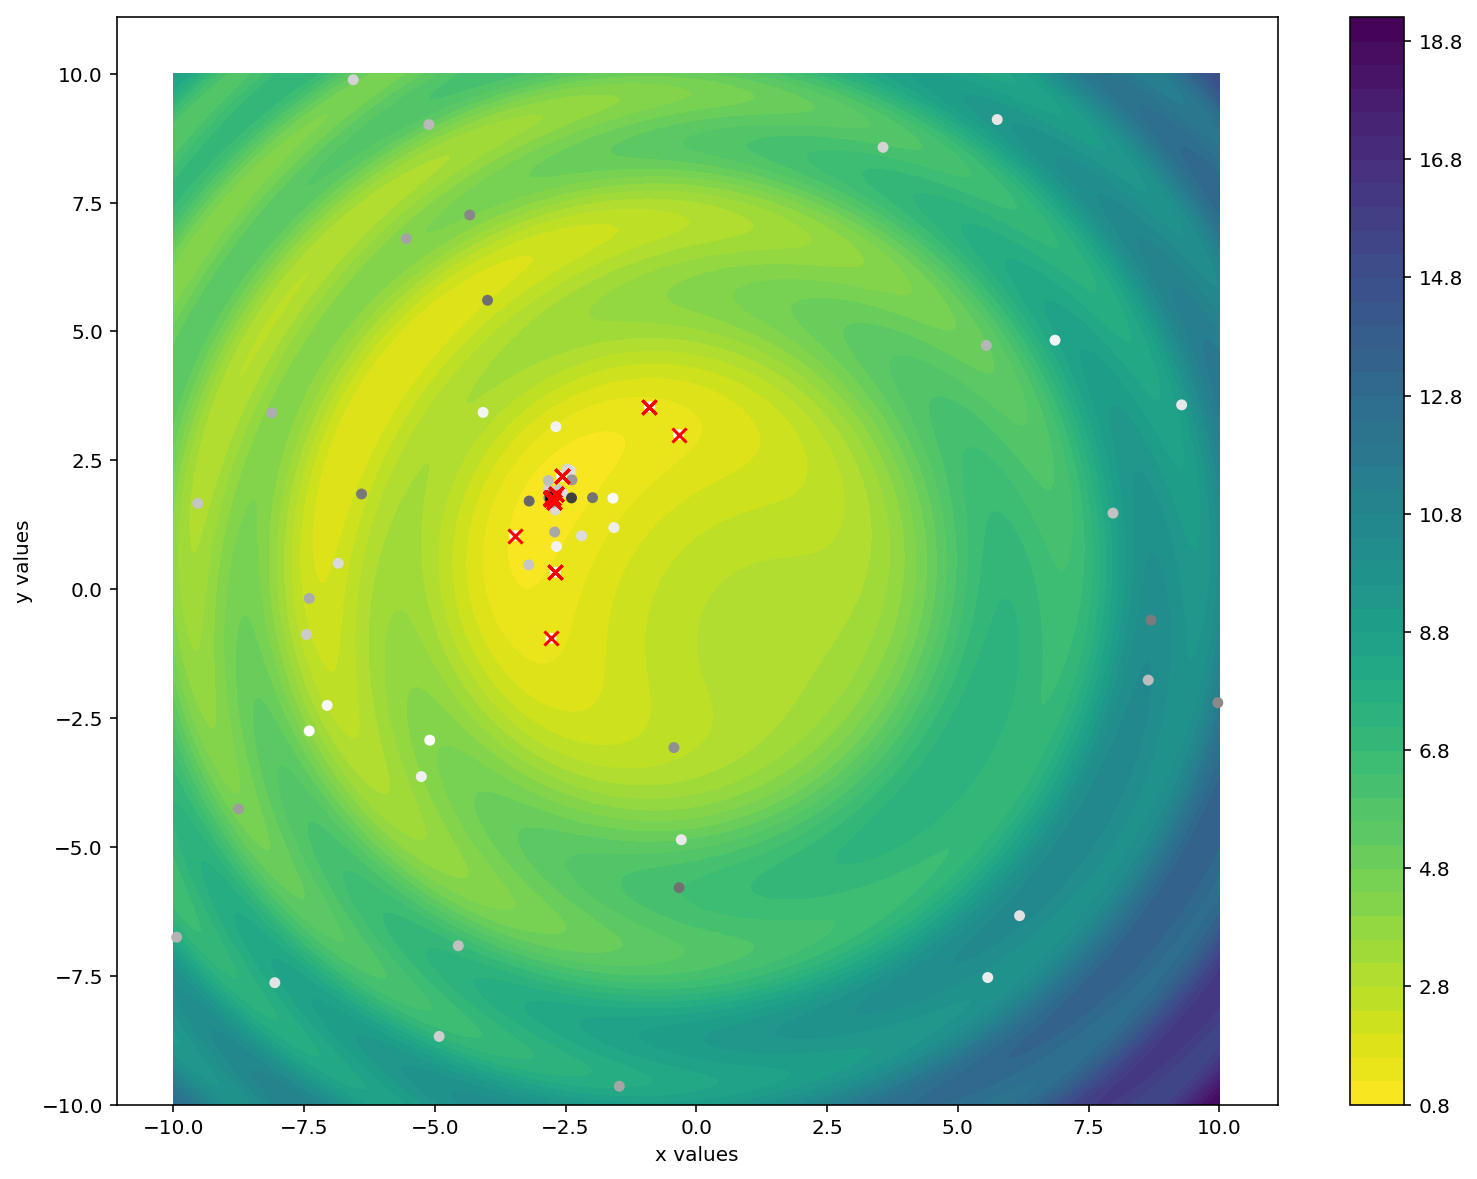

In [19]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction3D.txt"
best_y, curr_y, acceptance_pb, acc_best_sol, temp, density, markov_len, runtime, iteration_nbr = processDataDSA(path)
path = "../java/SimulatedAnnealing/GraphData/DSA_MF3D_currXY.txt"
best_x, curr_x, best_y, curr_y = processDataDSA_MF3D(path)
drawSolutionDSAMF3D(curr_y, best_y, curr_x, best_x)

SyntaxError: invalid syntax (<ipython-input-13-3310876787da>, line 1)